***
# <font color=green size=10>ANÁLISE DESCRITIVA</font>
***

## Veículos


<img src="https://storage.googleapis.com/kaggle-datasets-images/33080/43333/7b1639f76c1abfb8dfef64e254badbeb/dataset-cover.jpg?t=2018-06-24-19-20-03" class="Header_CoverImg--1431b7d eWPpsZ">

Este conjunto de dados contém informações sobre carros usados.
Esses dados podem ser usados ​​para diversos fins, como previsão de preços, para exemplificar o uso de regressão linear no Aprendizado de Máquina.
As colunas no conjunto de dados fornecido são as seguintes:

nome, ano, preço de venda, km_driven, combustível, vendedor_tipo, transmissão, Proprietário.

FONTE: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

Arquivo: 'Car details v3.csv'


# Importações

In [ ]:
import pandas as pd
import seaborn as sns

# Leitura e Compreenção dos Dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Especialização/Carros/Car details v3.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


O valor do carro (selling_price) está sem o separador decimal, desta forma será dividido por 100 para que este dado seja melhor ajustado a análise:

In [ ]:
df['selling_price'] = df['selling_price']/100

Deste modo:

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,4500.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,3700.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,1580.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,2250.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1300.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Quantidade de linhas e colunas:

In [ ]:
print(f'Quantidade de linhas: {df.shape[0]}')
print(f'Quantidade de Colunas: {df.shape[1]}')

Quantidade de linhas: 8128
Quantidade de Colunas: 13


# Colunas do Data Frame:

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Frequência do tipo de combustível:

In [ ]:
combustivel = df['fuel'].value_counts()
combustivel


Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

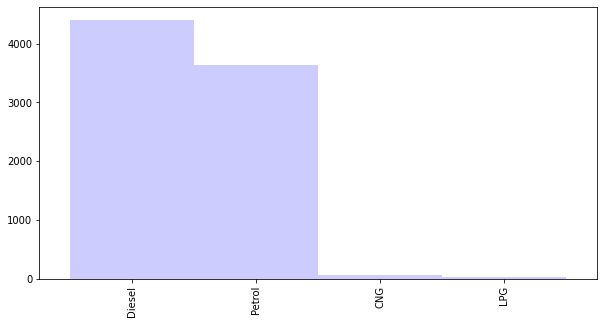

In [ ]:
combustivel_grafico = pd.DataFrame(data=combustivel)
combustivel_grafico['fuel'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(10, 5))

# Percentual Combustível

In [ ]:
combustivel_grafico['perc'] = round(combustivel_grafico['fuel']/df.shape[0] *100, 2)
combustivel_grafico

,fuel,perc
Diesel,4402,54.16
Petrol,3631,44.67
CNG,57,0.70
LPG,38,0.47


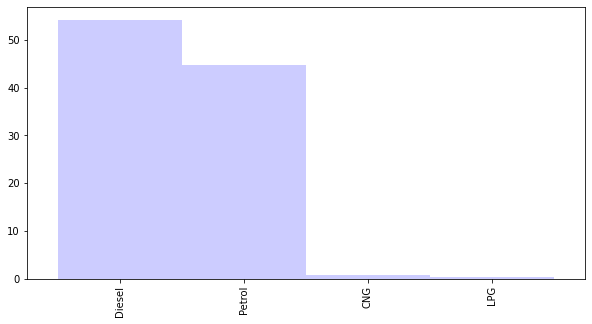

In [ ]:
combustivel_grafico['perc'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(10, 5))

# Frequência do tipo de câmbio:

In [ ]:
cambio = df['transmission'].value_counts()
cambio


Manual       7078
Automatic    1050
Name: transmission, dtype: int64

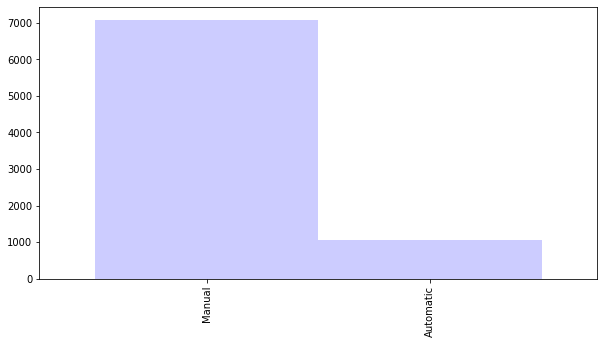

In [ ]:
cambio_grafico = pd.DataFrame(data=cambio)
cambio_grafico['transmission'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(10, 5))

# Percentual do Cambio Utilizado

In [ ]:
cambio_grafico['perc'] = round(cambio_grafico['transmission']/df.shape[0] *100, 2)
cambio_grafico

,transmission,perc
Manual,7078,87.08
Automatic,1050,12.92


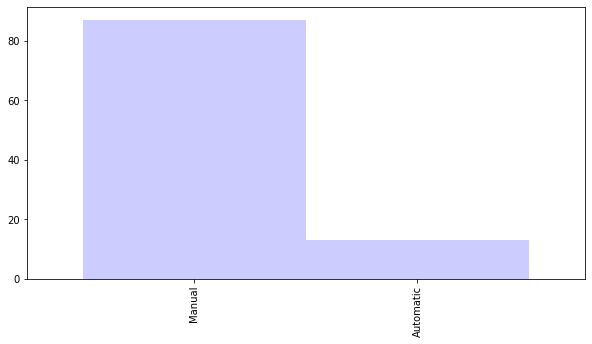

In [ ]:
cambio_grafico['perc'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(10, 5))

# Descrição do valor do carro pelo tipo de combustível e de câmbio:

In [ ]:
dados_veiculos = pd.crosstab(df.fuel, 
                            df.transmission, 
                            values = df.selling_price, 
                            aggfunc = {'median', 'mean', 'max', 'min'})
dados_veiculos

max                   mean  ...  median       min        
transmission Automatic   Manual     Automatic  ...  Manual Automatic  Manual
fuel                                           ...                          
CNG                NaN   5450.0           NaN  ...  3200.0       NaN  800.00
Diesel         72000.0  32000.0  25416.928708  ...  5000.0    2450.0  400.00
LPG                NaN   3750.0           NaN  ...  1955.0       NaN  540.00
Petrol        100000.0  15200.0  11765.600601  ...  3000.0     750.0  299.99

[4 rows x 8 columns]

# Estatistica Aplicada

# Análise do preço de venda do veículo:

In [ ]:
preco = df['selling_price'].describe()
preco = round(preco,2)
preco

count      8128.00
mean       6382.72
std        8062.53
min         299.99
25%        2549.99
50%        4500.00
75%        6750.00
max      100000.00
Name: selling_price, dtype: float64

# Analise da quantidade de km rodados:

In [ ]:
km = df['km_driven'].describe()
km = round(km,2)
km

count       8128.00
mean       69819.51
std        56550.55
min            1.00
25%        35000.00
50%        60000.00
75%        98000.00
max      2360457.00
Name: km_driven, dtype: float64

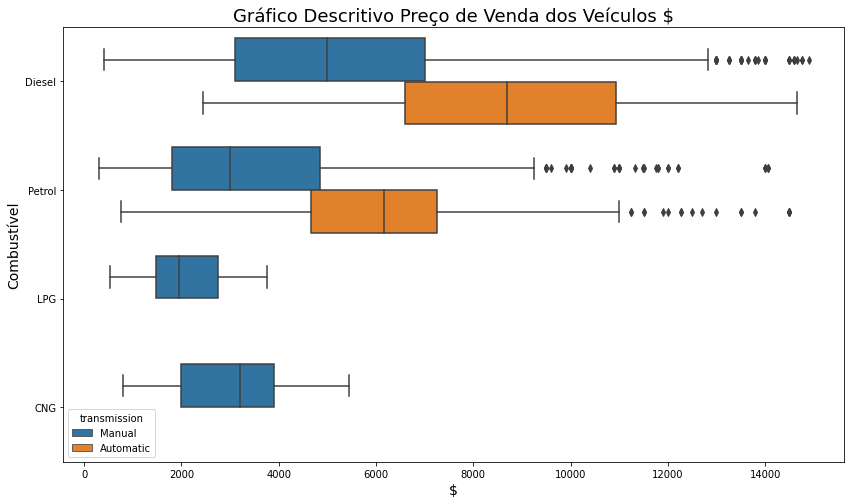

In [ ]:
ax = sns.boxplot(x = 'selling_price', y = 'fuel', hue = 'transmission', data=df.query('selling_price < 15000'), orient='h')
ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura
ax.set_title('Gráfico Descritivo Preço de Venda dos Veículos $', fontsize=18)    # Configurando o título do gráfico
ax.set_xlabel('$', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('Combustível', fontsize=14)    # Configurando o label do eixo Y

ax

# Análise da Moda

Preço de venda:

In [ ]:
df.selling_price.mode()[0]

3000.0

Assentos:

In [ ]:
df.seats.mode()[0]

5.0

Consumo:

In [ ]:
df.mileage.mode()[0]

'18.9 kmpl'

Torque:

In [ ]:
df.torque.mode()[0]

'190Nm@ 2000rpm'

Modelo Mais vendido:

In [ ]:
df.name.mode()[0]

'Maruti Swift Dzire VDI'

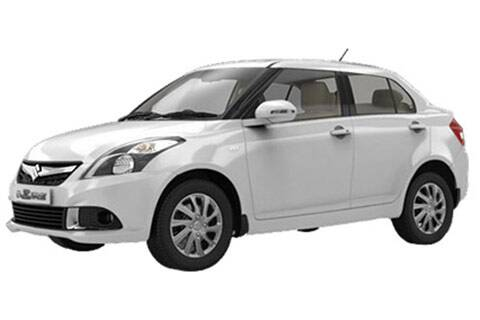

# Pensar em que tipo de algoritmo de inteligência artificial poderia ser utilizado para um determinado tipo de dado. Explicar o porquê da escolha.

Para este caso seria utilizado um algoritimo de regressão linear para tentar predizer o preço do carro com base nas informações do mesmo. Isso viabilizaria a construção de um sistema Web ou Mobile para avaliação de um veículo, que pederia ser feita pelo própio cliente, ou poderia ajuraria um vendedor a ter uma resposta mais adequada para uma proposta comercial.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Especialização/Carros/Car details v3.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,4500.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,3700.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,1580.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,2250.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1300.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Ajustando a Coluna Modelo

In [ ]:
modelo = pd.DataFrame(data=df.name.unique())
modelo.columns = ['MODELO']
modelo = modelo.sort_values('MODELO')
modelo = modelo.drop_duplicates()
modelo = modelo.reset_index()
modelo['index'] = modelo.index

modelo

,index,MODELO
0,0,Ambassador CLASSIC 1500 DSL AC
1,1,Ambassador Classic 2000 DSZ AC PS
2,2,Ambassador Grand 1500 DSZ BSIII
3,3,Ambassador Grand 2000 DSZ PW CL
4,4,Ashok Leyland Stile LE
...,...,...
2053,2053,Volvo V40 D3 R-Design
2054,2054,Volvo XC40 D4 Inscription BSIV
2055,2055,Volvo XC40 D4 R-Design
2056,2056,Volvo XC60 Inscription D5 BSIV
